In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import scresonators.measurement.handy as hy
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = os.path.join(pth_base,folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')
meas = 'silta6_res2c2'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
params, data_pth, folder, img_name = hy.get_params('mini.yml', meas, pth=pth)
data_pth = os.path.join(data_pth, folder)

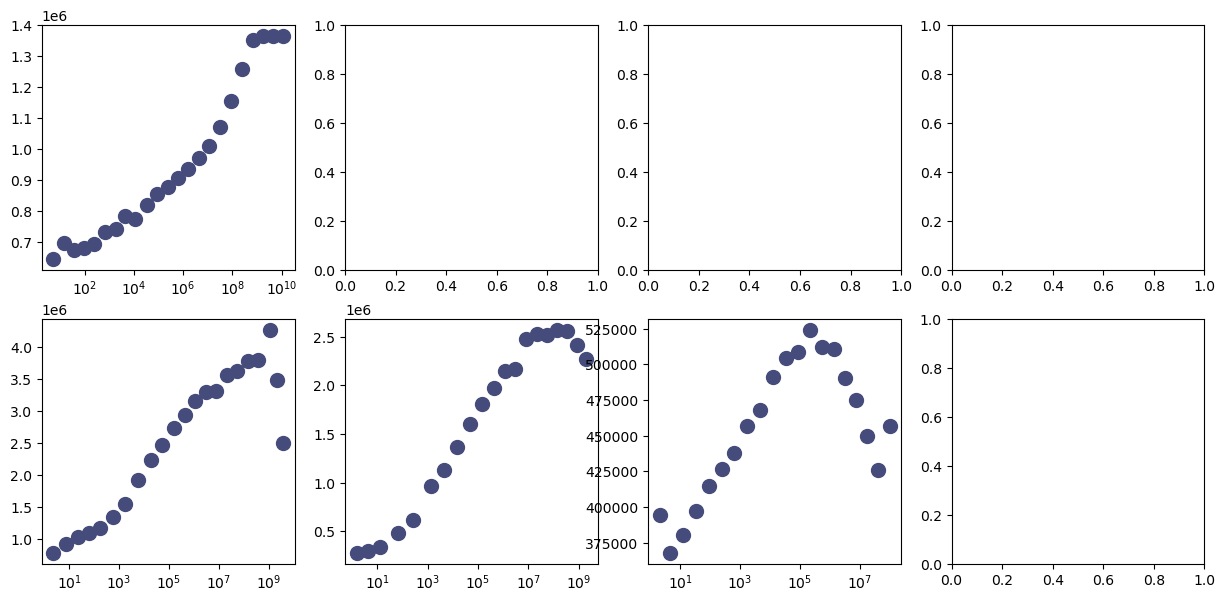

In [ ]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
csv_files_in_dir = [f for f in os.listdir(data_pth) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    ax[ord[i]].semilogx(df['photon_number'], df['q_internal_alt'],'o')


In [60]:
df_full = df_full.sort_values(by='pitch')

Failed!
Failed!
Failed!
Failed!


Traceback (most recent call last):
  File "/Users/sph/Documents/Git/scresonators/../scresonators/fit_resonator/ana_tls.py", line 318, in fit_qi2
    p, err = curve_fit(
             ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py", line 974, in curve_fit
    res = least_squares(func, p0, jac=jac, bounds=bounds, method=method,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_lsq/least_squares.py", line 839, in least_squares
    raise ValueError("Residuals are not finite in the initial point.")
ValueError: Residuals are not finite in the initial point.
Traceback (most recent call last):
  File "/Users/sph/Documents/Git/scresonators/../scresonators/fit_resonator/ana_tls.py", line 318, in fit_qi2
    p, err = curve_fit(
             ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py", line 974, in curve_fit
    re

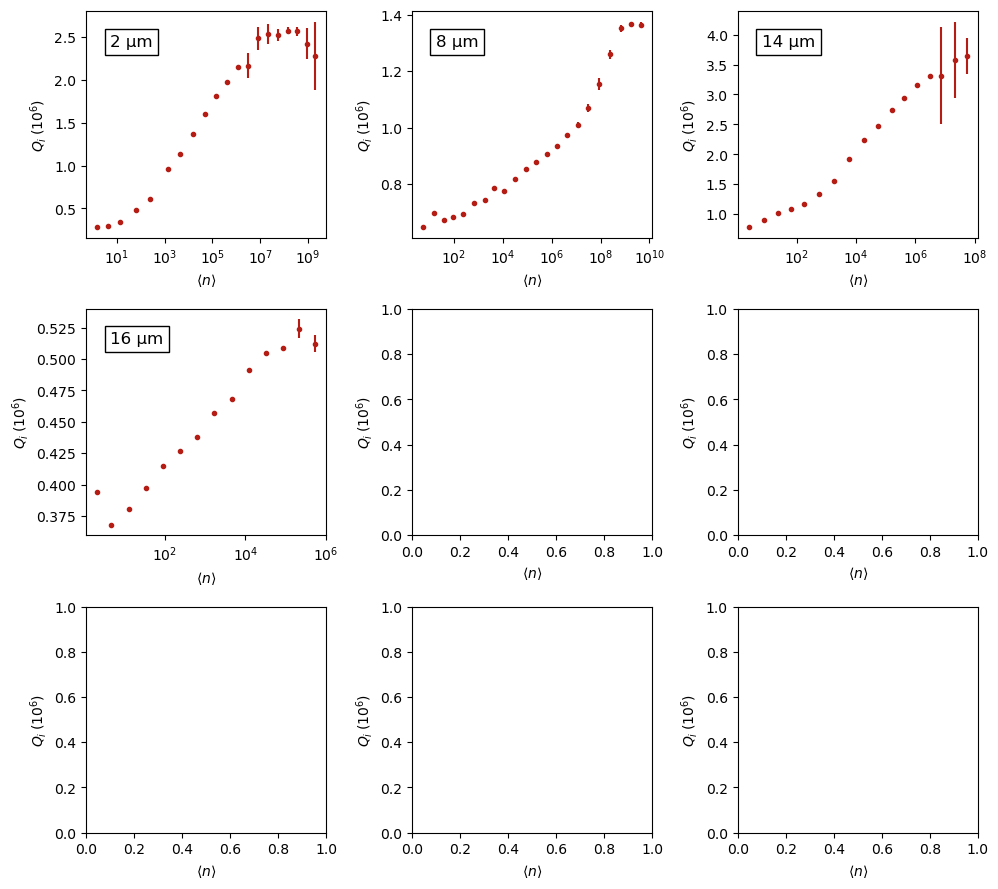

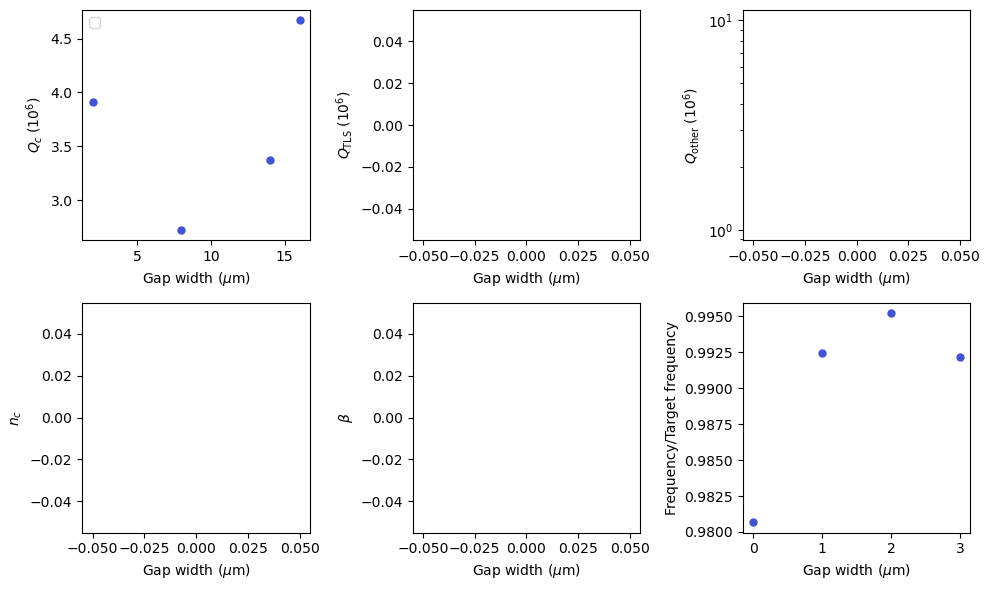

In [ ]:
max_photon = [1e10, 1e10, 1e8, 1e6]
min_photon = [1, 1,1, 1]
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon) 
ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)